In [110]:
import pandas as pd
from IPython.core.display import display
import os
mypath = 'C:\\Users\Lenovo\\Downloads\\Sales_Data'
from os import listdir
os.chdir('C:\\Users\Lenovo\\Downloads\\Sales_Data')
files = [f for f in listdir(mypath)]
all_data = pd.DataFrame()
for file in files:
    current_data = pd.read_excel(mypath+"\\"+file)
    all_data = pd.concat([all_data, current_data])
all_data.rename(columns={" Sales":"Sales"}, inplace=True)
all_data.to_csv('all_data.csv')


In [111]:
summary = pd.read_csv ('all_data.csv')
summary.head()

,Unnamed: 0,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,0,Government,Canada,Carretera,None,718.0,1.815,24.20,17375.60,0.0,17375.60,1563.804,15811.796,2015-01-01
1,1,Government,Germany,Carretera,None,1019.0,1.815,24.20,24659.80,0.0,24659.80,2219.382,22440.418,2015-01-01
2,2,Midmarket,France,Carretera,None,2003.0,1.815,18.15,36354.45,0.0,36354.45,4362.534,31991.916,2015-06-01
3,3,Midmarket,Germany,Carretera,None,4767.0,1.815,18.15,86521.05,0.0,86521.05,10382.526,76138.524,2015-06-01
4,4,Midmarket,Mexico,Carretera,None,3666.0,1.815,18.15,66537.90,0.0,66537.90,7984.548,58553.352,2015-06-01


In [112]:

summary['Year'] = pd.to_datetime(summary['Date']).dt.year
summary['Month'] = pd.to_datetime(summary['Date']).dt.month
summary.to_csv('summary.csv')
table = summary.groupby(['Country','Year']).agg({'Profit':'sum','Sales':'sum'}).reset_index()
table.to_csv('table.csv')
profitability_by_country=pd.read_csv('table.csv')


In [117]:

profitability_by_country['Profitability %']= profitability_by_country['Profit']/profitability_by_country['Sales']
output = profitability_by_country.to_string(formatters={
    'Sales': '{:,.1f}'.format,
    'Profit': '{:,.1f}'.format,
    'Profitability %': '{:,.2%}'.format
})
print(output)


    Unnamed: 0                   Country  Year       Profit        Sales Profitability %
0            0                    Canada  2013    803,671.8  5,175,888.8          15.53%
1            1                    Canada  2014  2,725,557.1 19,711,766.1          13.83%
2            2                    Canada  2015 11,619,825.2 51,336,234.5          22.63%
3            3                    Canada  2016    381,833.9 12,915,802.8           2.96%
4            4                    Canada  2017  9,677,508.0 27,741,808.2          34.88%
5            5                    Canada  2018  4,312,780.6 14,151,837.5          30.48%
6            6                    Canada  2019  3,603,445.4 25,668,117.3          14.04%
7            7                    Canada  2020   -699,474.5  6,976,483.2         -10.03%
8            8                    France  2013    811,332.2  5,132,795.2          15.81%
9            9                    France  2014  2,969,688.6 19,221,377.1          15.45%
10          10       

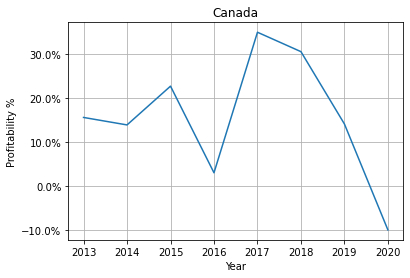

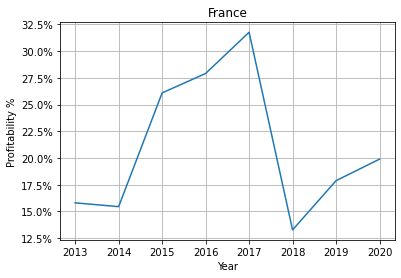

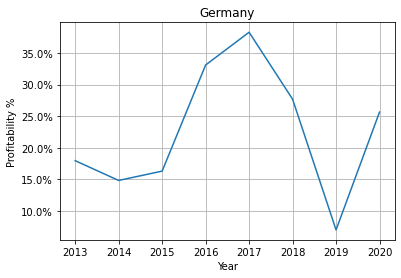

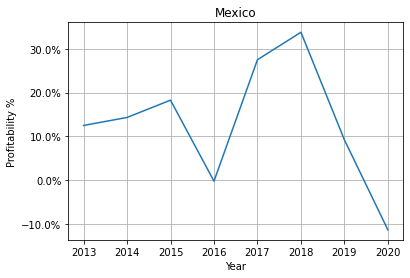

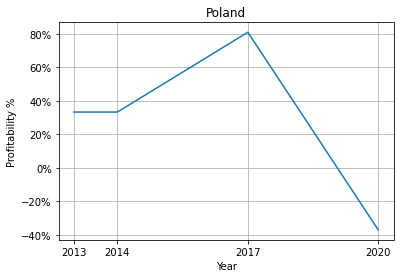

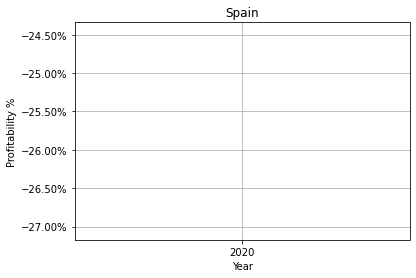

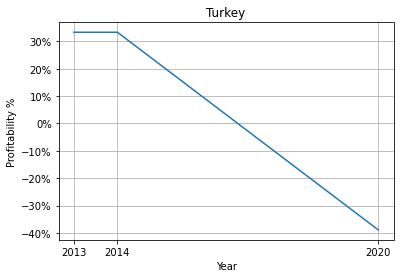

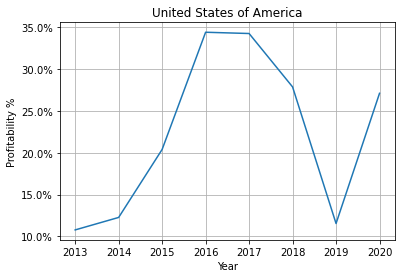

In [139]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
country_list=[]
for country in profitability_by_country['Country']:
    if country not in country_list:
        country_list.append(country),
        pc2=profitability_by_country[profitability_by_country["Country"] == country]
        plt.plot(pc2['Year'],pc2.groupby(['Year']).sum()['Profitability %'])
        plt.xticks(pc2['Year'])
        plt.ylabel('Profitability %')
        plt.xlabel('Year')
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
        plt.title(country, fontdict=None, loc='center', pad=None,)
        plt.grid()
        plt.show()
    pass
